# **<center>PYTHON PROJECT : AUSTO MOTOR COMPANY DATA ANALYSIS</center>**
------------------------------------------------------------------------

## **Context**

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.



 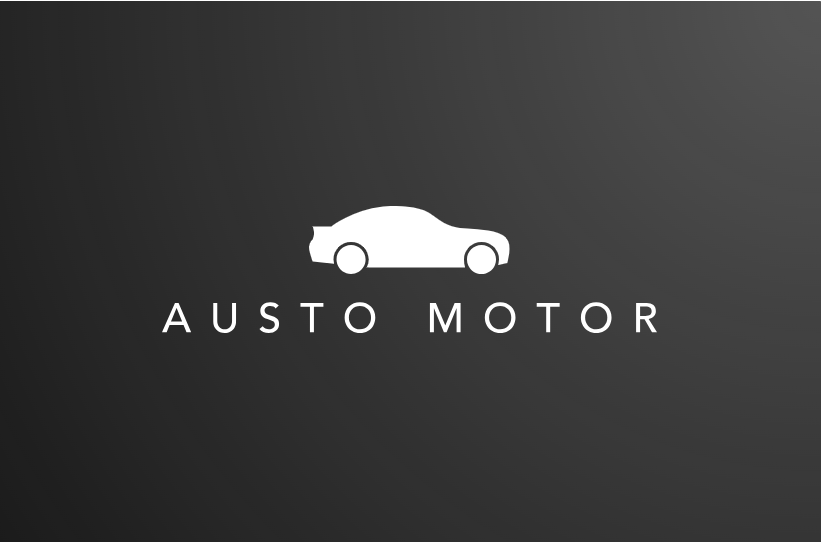

## **Objective**
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## **Data Desecription**

1.  **Age:** The age of the individual in years.
2.  **Gender:** The gender of the individual, categorized as male or female.
3.  **Profession:** The occupation or profession of the individual.
4.  **Marital_status:** The marital status of the individual, such as married &, single
5. **Education:** The educational qualification of the individual Graduate and Post Graduate
6. **No_of_Dependents:** The number of dependents (e.g., children, elderly parents) that the individual supports financially.
7. **Personal_loan:** A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
8. **House_loan:** A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
9. **Partner_working:** A binary variable indicating whether the individual's partner is employed "Yes" or "No"
10. **Salary:** The individual's salary or income.
11. **Partner_salary:** The salary or income of the individual's partner, if applicable.
12. **Total_salary:** The total combined salary of the individual and their partner (if applicable).
13. **Price:** The price of a product or service.
14. **Make:**The type of automobile





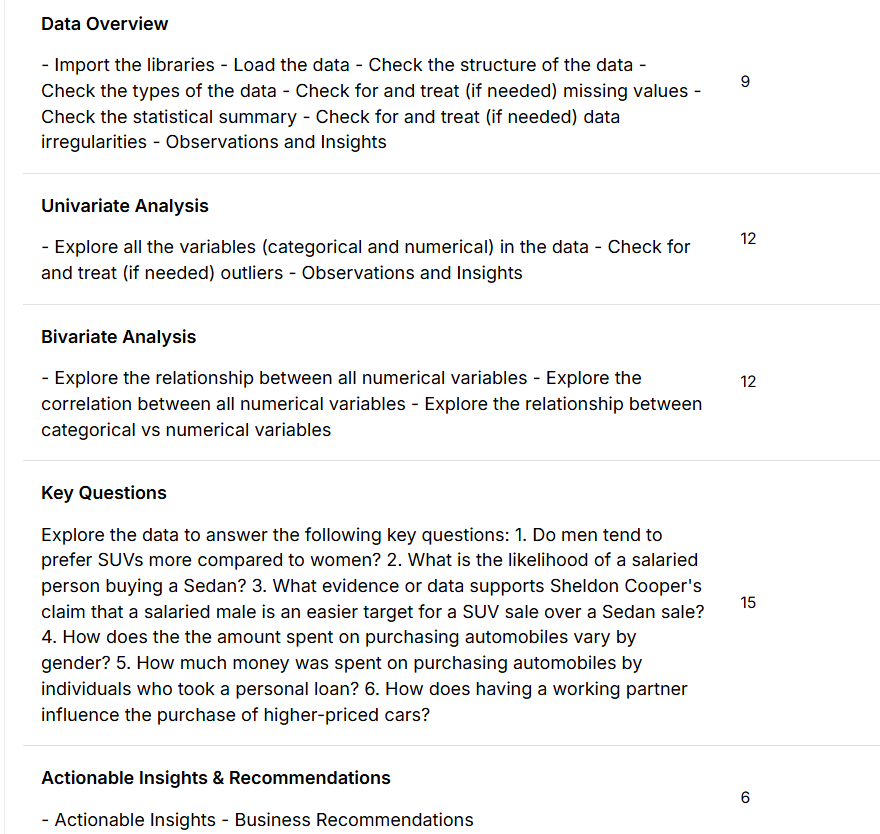

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the required libraries

In [3]:
# Import libraries for data manipulation and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Load the given data**

In [4]:
file_path = '/content/drive/My Drive/austo_automobile.csv'
df = pd.read_csv(file_path)

In [5]:
#Show top 5 rows of data
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
#check structure of data
df.shape

(1581, 14)



*   *Given data contains 1581 rows and 14 columns*




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [8]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [9]:
#Checking missing values in particular column
missing_values = df.isnull().sum()
missing_values[missing_values>0]

,0
Gender,53
Partner_salary,106



*   *we can check data types of each column here*
*  *we can see in above information that two column have null values and column are Gender and Partner_salary*




In [10]:
#Checking duplicate values in data set
df[df.duplicated()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


## MISSING VALUE TREATMENT

In [11]:
#Since Gender column is categorical column so we can treat that by mode method
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [12]:
# for column partner_salary first will see the data which have null values in this column
Null_partner_salary = df[df['Partner_salary'].isna()]
Null_partner_salary

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


In [13]:
# Those partner who not working there their partner_salary should be zero or null
partner_not_working = df[df['Partner_working'] == 'No'].value_counts()
partner_not_working

Age  Gender  Profession  Marital_status  Education      No_of_Dependents  Personal_loan  House_loan  Partner_working  Salary  Partner_salary  Total_salary  Price  Make     
22   Male    Business    Married         Graduate       3                 No             No          No               36000   0.0             36000         33000  Hatchback    1
35   Male    Business    Married         Post Graduate  2                 Yes            No          No               70900   0.0             70900         59000  SUV          1
34   Male    Salaried    Single          Post Graduate  2                 No             Yes         No               64800   0.0             64800         32000  Sedan        1
35   Female  Business    Married         Post Graduate  1                 No             No          No               63700   0.0             63700         37000  Sedan        1
             Salaried    Married         Graduate       2                 Yes            No          No               50400   0.0             50400         57000  SUV          1
                                                                                                                                                                               ..
27   Male    Business    Married         Post Graduate  2                 Yes            No          No               75800   0.0             75800         22000  Hatchback    1
                                                        3                 No             No          No               71300   0.0             71300         20000  Sedan        1
                                                                          Yes            Yes         No               67600   0.0             67600         28000  Sedan        1
                                                                                                                      74100   0.0             74100         23000  Hatchback    1
54   Male    Salaried    Married         Post Graduate  3                 No             No          No               82300   0.0             82300         64000  SUV          1
Name: count, Length: 623, dtype: int64

In [14]:
# To confirm that partner those who not working there salary should be zero
partner_salary_sum = df[df['Partner_working'] == 'No']['Partner_salary'].sum()
partner_salary_sum

0.0

In [15]:
# now will check from out of 106 null values how many partner working is "NO" and how many " yes" by doing group by
null_partner_salary_grouping = Null_partner_salary.groupby('Partner_working').size()
null_partner_salary_grouping

,0
Partner_working,
No,90
Yes,16


 *So, it means 90 are those partner who not workinhg so there salary should be 0*

In [16]:
df.loc[df['Partner_working'] == 'No', 'Partner_salary'] = 0

we can see that salary + partner salary = Total salary, so we can find remaining 16 by this equation; Partner salary = Total salary - salary

In [17]:
df.loc[df['Partner_working'] == 'Yes', 'Partner_salary'] = df['Total_salary'] - df['Salary']

In [18]:
# Now check null values in our data
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


*So now no null values exist in our data*

In [19]:
unique_values = df.apply(lambda x: x.unique())
unique_values

,0
Age,"[53, 52, 50, 49, 47, 46, 45, 51, 54, 48, 44, 4..."
Gender,"[Male, Femal, Female, Femle]"
Profession,"[Business, Salaried]"
Marital_status,"[Married, Single]"
Education,"[Post Graduate, Graduate]"
No_of_Dependents,"[4, 3, 2, 1, 0]"
Personal_loan,"[No, Yes]"
House_loan,"[No, Yes]"
Partner_working,"[Yes, No]"
Salary,"[99300, 95500, 97300, 72500, 79700, 79800, 809..."


*There is typo mistake in gender column. We will correct this by replace method*

In [20]:
df['Gender'].replace({'Femal': 'Female', 'Femle': 'Female'}, inplace=True)

In [21]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0




*   The average age around 32 years.
*   The age distribution ranges from 22 to 54 years, indicating a relatively young to middle-aged


*  Individuals have 2.46 dependents, which shown either 2 or 3 dependents.
*   The minimum dependents is 0, and the maximum is 4 which shown some are financially independent and some are not.


*   The average salary is around 60392.
*  The salary range is from ₹30,000 to ₹99,300 which shown wide range of incomes.

*   Many partners may not be working, as shown by the minimum value of 0 and the 25th percentile also being 0. The maximum salary is 80500, showing that some partners have a good icome
*  The relatively high variability in automobile prices suggests that there are different categories of cars being purchased, which could be analyzed further to understand customer preferences











## **UNIVARATE ANALYSIS**

----------------------------------------------------------------------------------------------------------------------------------------------------------------

### **1. Age Distribution**



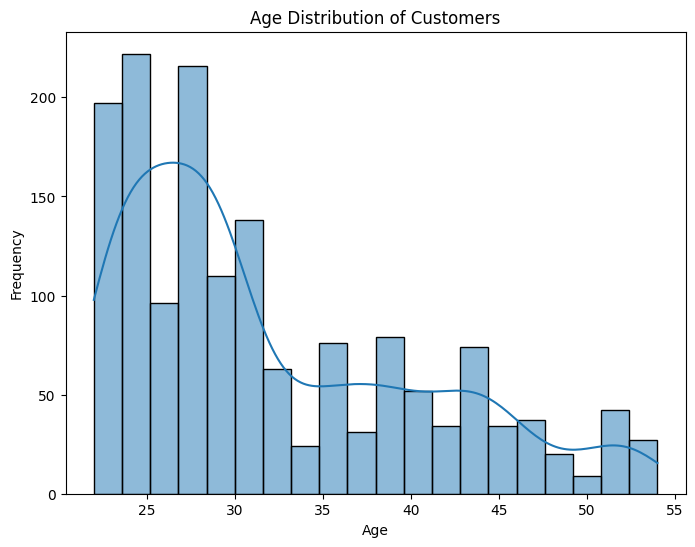

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

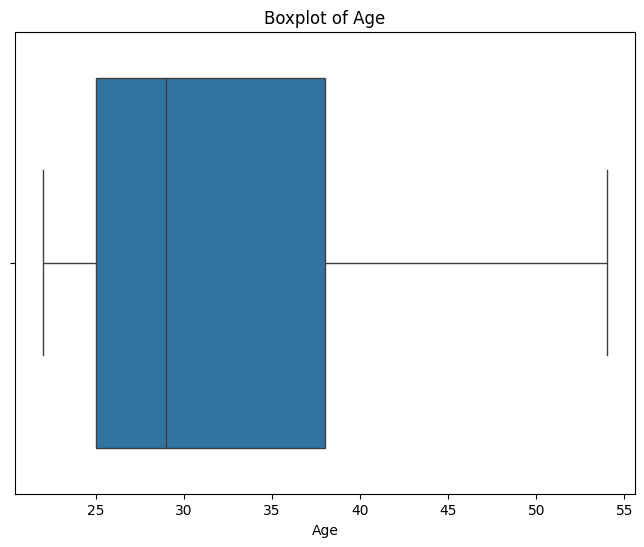

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

### **2.GENDER RATIO**

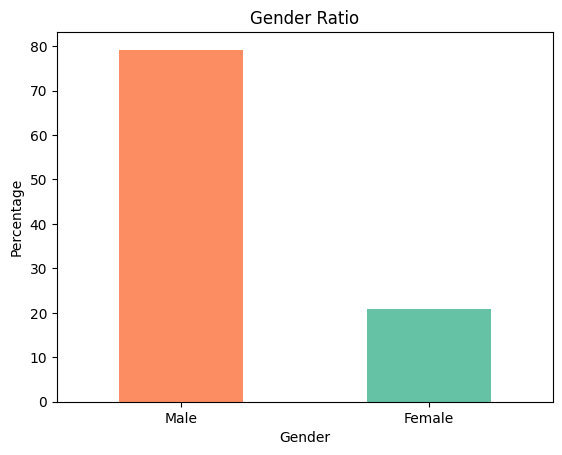

In [25]:
(df['Gender'].value_counts(normalize=True)*100).plot(kind='bar',color=['#FC8D62', '#66C2A5'],ylabel='Percentage')
plt.title('Gender Ratio')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

### **3. NUMBER OF DEPENDENT IN FAMILY**

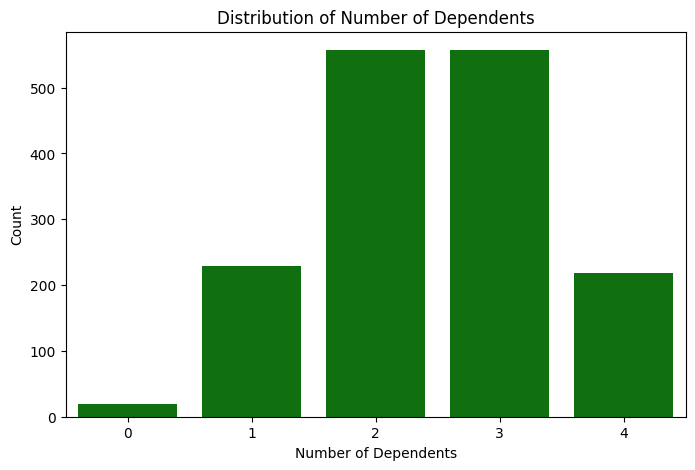

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='No_of_Dependents', data=df,color= 'GREEN')
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

### **4 . PROFESSION WISE DISTRIBUTION**

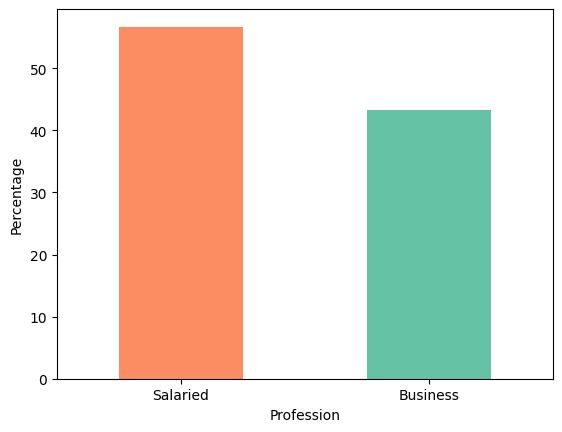

In [27]:
(df['Profession'].value_counts(normalize=True)*100).plot(kind='bar', color = ['#FC8D62', '#66C2A5'],ylabel='Percentage')
plt.xticks(rotation=0)
plt.show()

### **5. MARTITAL STATUS DISTRIBUTION**

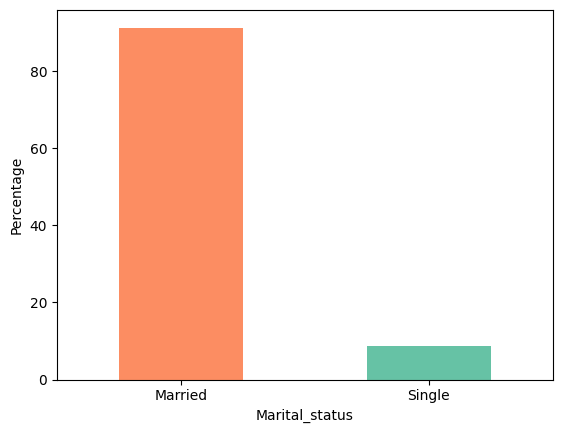

In [28]:
(df['Marital_status'].value_counts(normalize=True)*100).plot(kind='bar',color = ['#FC8D62', '#66C2A5'],ylabel='Percentage')
plt.xticks(rotation=0)
plt.show()

### **6. DISTRIBUTION ON EDUCATION BASIS**

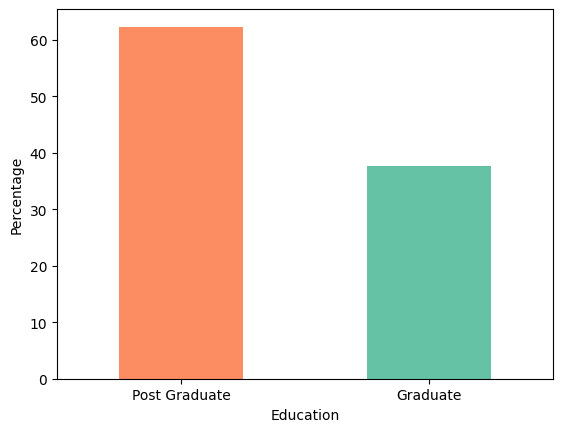

In [29]:
(df['Education'].value_counts(normalize=True)*100).plot(kind='bar',color = ['#FC8D62', '#66C2A5'],ylabel='Percentage')
plt.xticks(rotation=0)
plt.show()

### **7. PERSONAL LOAN DISTRIBUTION**

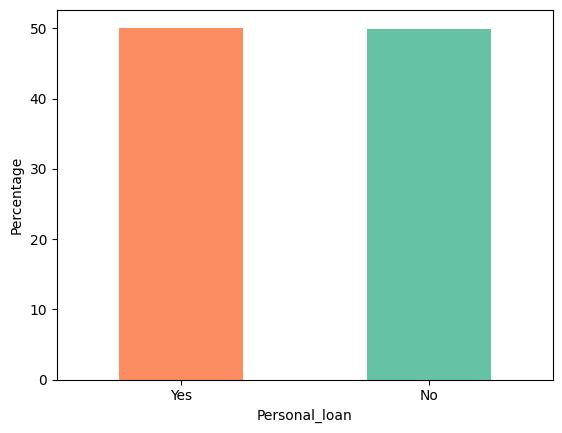

In [30]:
(df['Personal_loan'].value_counts(normalize=True)*100).plot(kind='bar',color = ['#FC8D62', '#66C2A5'],ylabel='Percentage')
plt.xticks(rotation=0)
plt.show()


### **8. HOME LOAN AVAIL OR NOT**

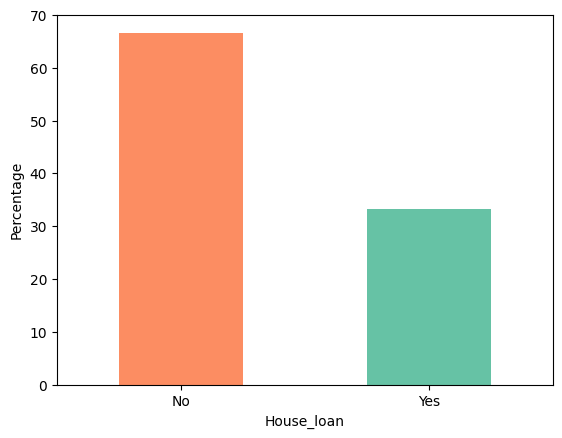

In [31]:
(df['House_loan'].value_counts(normalize=True)*100).plot(kind='bar',color=['#FC8D62', '#66C2A5'],ylabel='Percentage')
plt.xticks(rotation=0)
plt.show()

### **9. PARTNER WORKING STATUS DISTRIBUTION**

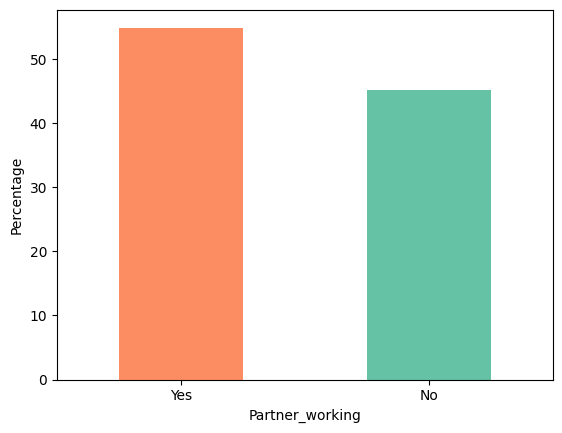

In [32]:
(df['Partner_working'].value_counts(normalize=True)*100).plot(kind='bar',color=['#FC8D62', '#66C2A5'],ylabel='Percentage')
plt.xticks(rotation=0)
plt.show()

### **10. SALARY DISTRIBUTION**

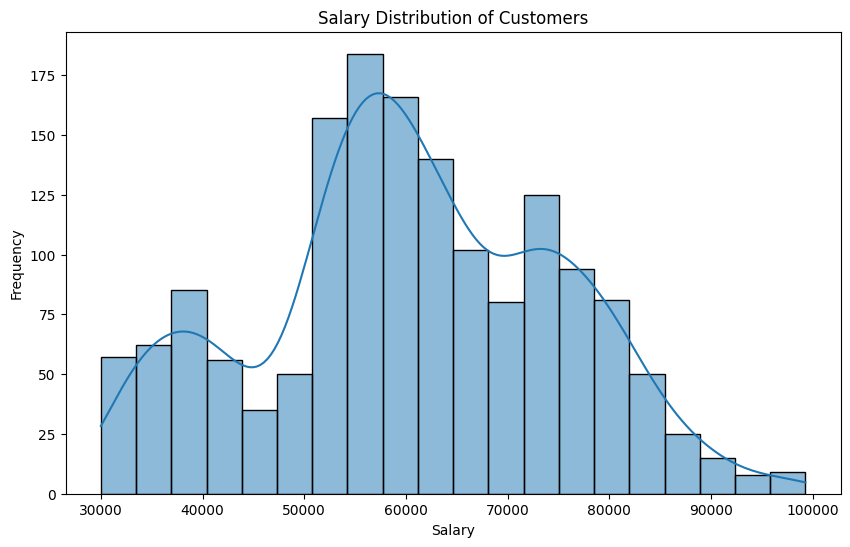

In [33]:
 plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Salary Distribution of Customers')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

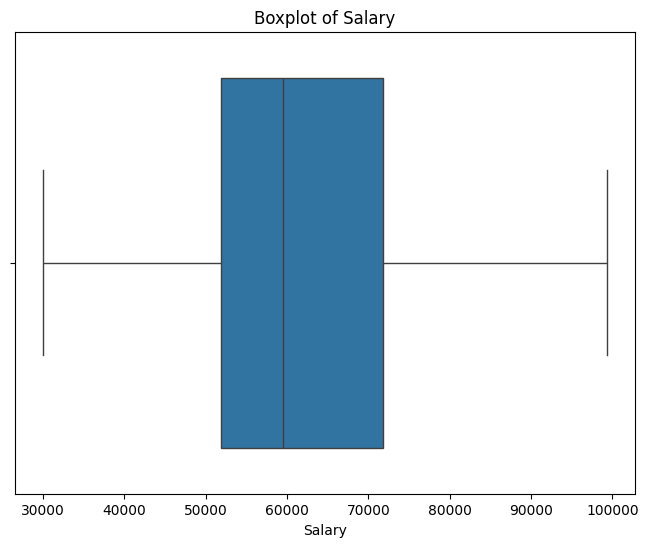

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary')
plt.show()

### **11. PARTNER SALARY DISTRIBUTION**


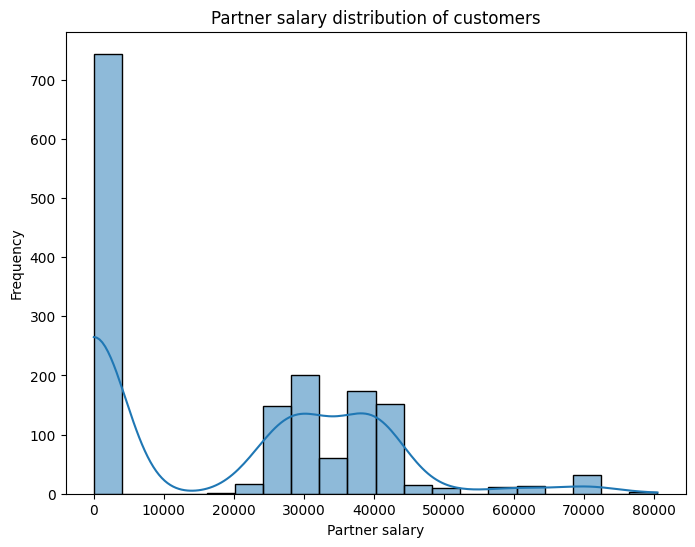

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Partner_salary'], bins=20, kde=True)
plt.title('Partner salary distribution of customers')
plt.xlabel('Partner salary')
plt.ylabel('Frequency')
plt.show()

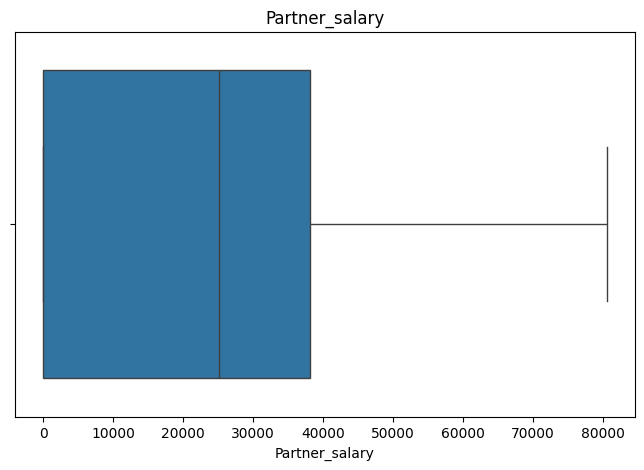

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Partner_salary'])
plt.title('Partner_salary')
plt.show()

### **12. TOTAL SALARY DISTRIBUTION**

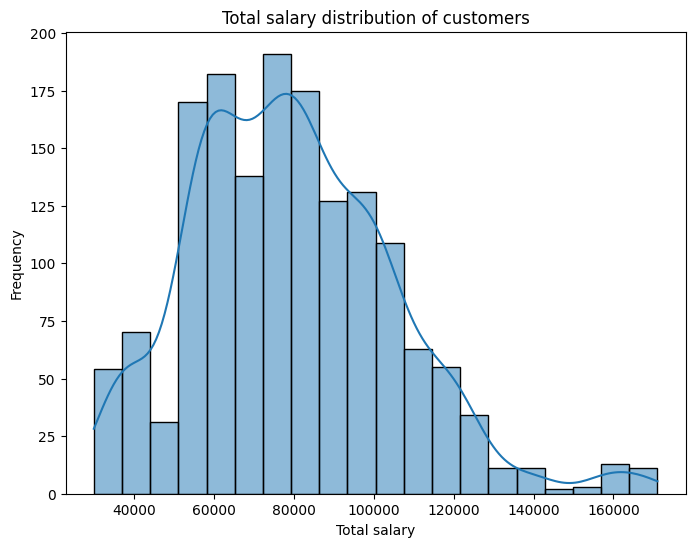

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_salary'], bins=20, kde=True)
plt.title('Total salary distribution of customers')
plt.xlabel('Total salary')
plt.ylabel('Frequency')
plt.show()

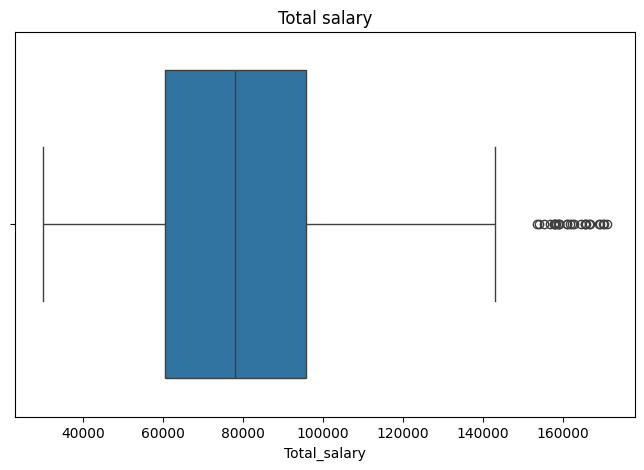

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total_salary'])
plt.title('Total salary')
plt.show()

### **13. CAR Price DISTRIBUTION**

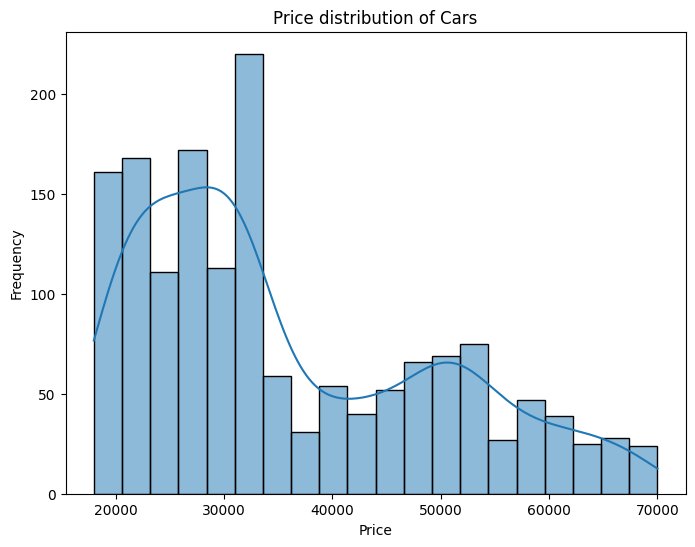

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price distribution of Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

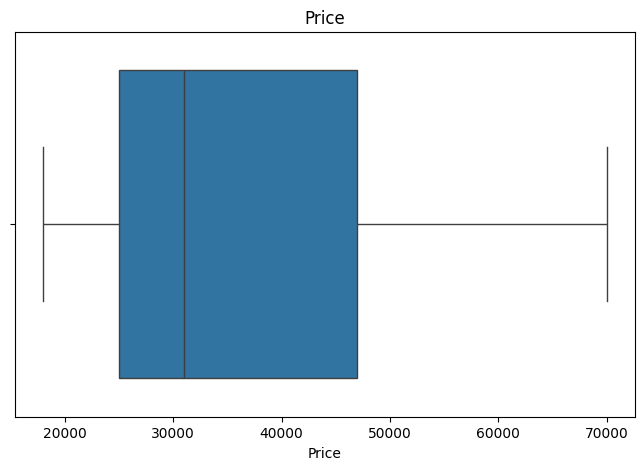

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Price')
plt.show()

### **14. Distribution of Car Makers**

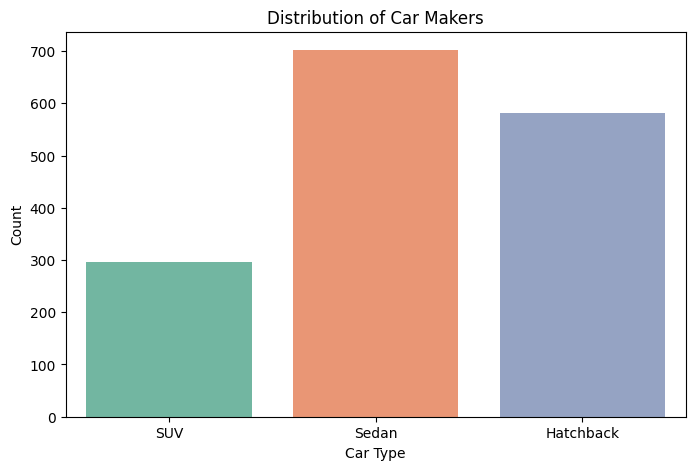

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Make', hue='Make', data=df, palette='Set2', legend=False)
plt.title('Distribution of Car Makers')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.show()

*Insights*:-

*•	Age Distribution: Most customers are concentrated within 22-32 age group, which we can targeted marketing.*

*•	Gender Distribution: Male customer is more compared to female. So, our more concentration on male customer*

*•	 Profession Distribution: Salaried profession customer more than the customer who are has business as profession.*

*•	Marital Status Distribution: Customer who are married they are in large number compared to single.*

*•	 Education Distribution: Customers who are postgraduate are in large number compare to graduate people.*

*•	Number of Dependents Distribution: Most of customer have 2 or 3 dependants family members.*

*•	 Personal Loan Distribution: There are equal number of customers who took personal loan and who not took loan. Its not give clear picture that much*

•*	 House Loan Distribution: Customer who do not took house loan are in larger number.*

*•	 Partner Working Distribution: Large number of customer are those who their partner is working.*

*•	 Salary, Partner Salary, and Total Salary Distributions: Most Customer salary concentrated between 52000-72000 whereas In partner salary, 25000-45000 are mostly those who working. There is also zero value who not working. In Total salary distribution, mostly customer salary range between 60000-95000.*

*•	 Price Distribution: Mostly people are those who bought car price between 20000-32000 range*

•	 Make Distribution: Sedan car most favourite between the customers followed by hatchback then SUV *italicized text*




# **BIVARATE ANALYSIS**

### **Explore the relationship between all numerical variables**

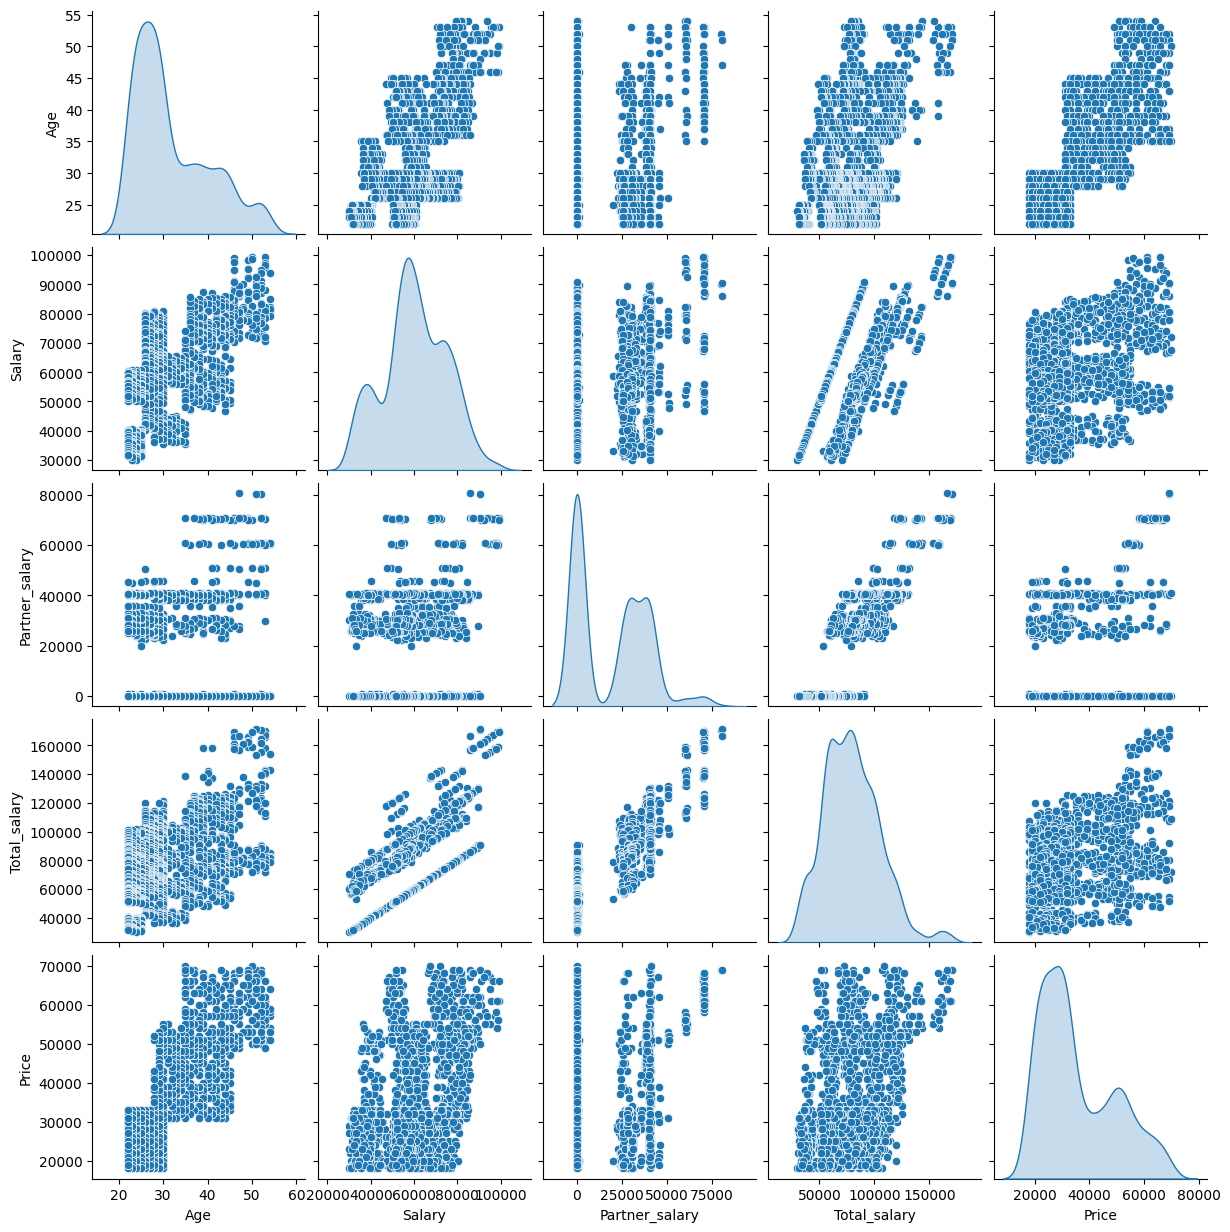

In [42]:
sns.pairplot(df[['Age' ,'Salary', 'Partner_salary','Total_salary', 'Price']], diag_kind='kde')
plt.show()

### **Explore the correlation between all numerical variables**

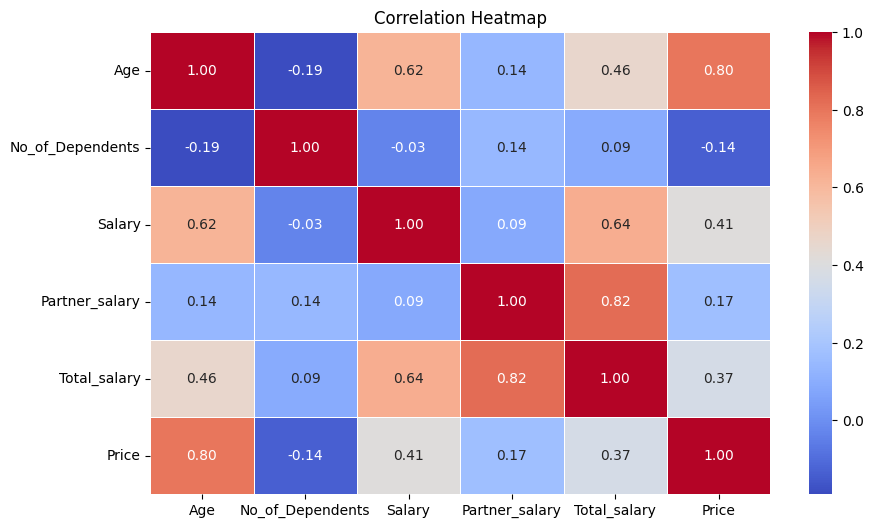

In [43]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Explore the relationship between categorical vs numerical variables**

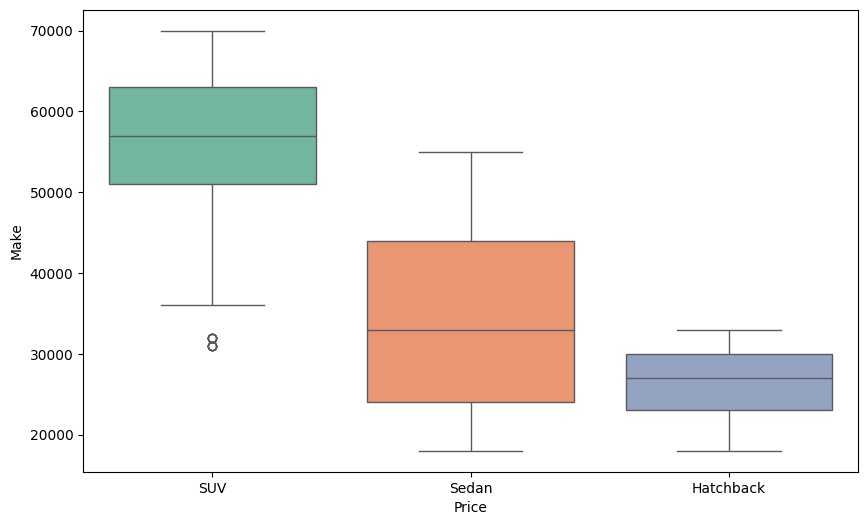

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Make'], y=df['Price'],hue=df['Make'],legend=False, palette='Set2');
plt.ylabel('Make')
plt.xlabel('Price')
plt.show()

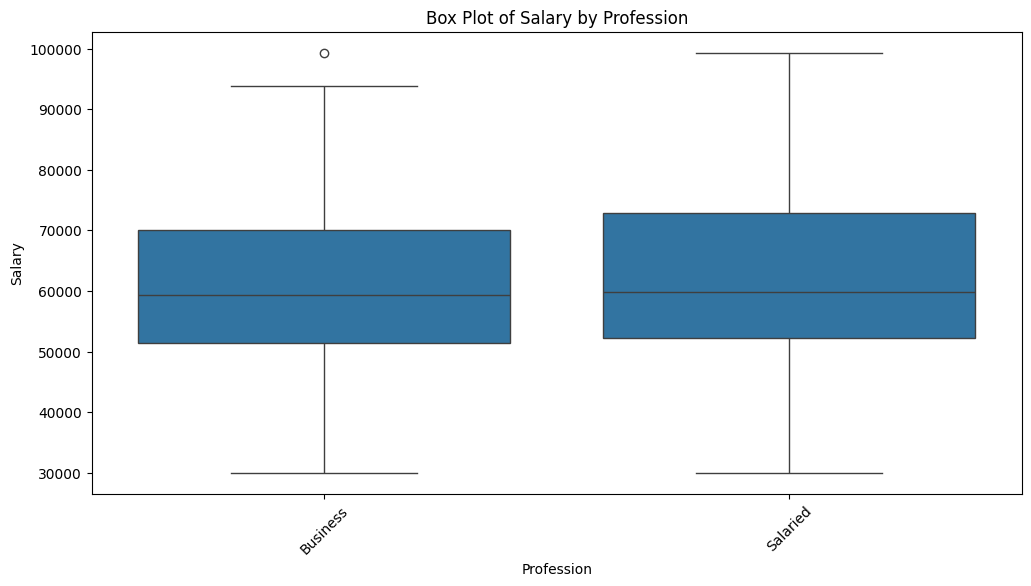

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Profession', y='Salary', data=df)
plt.title('Box Plot of Salary by Profession')
plt.xticks(rotation=45)
plt.show()

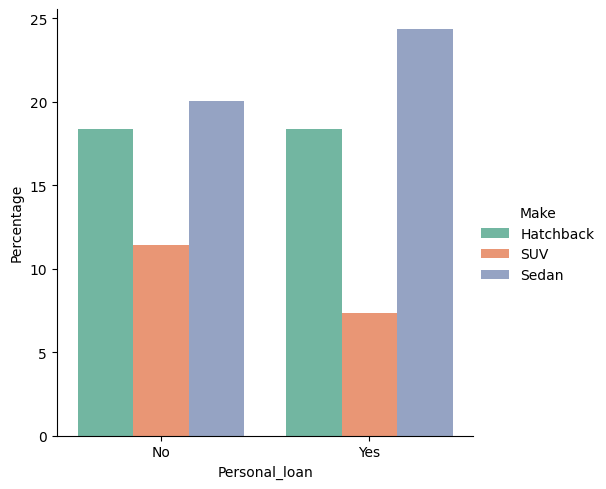

In [46]:
Personal_loan_customer = df.groupby(['Personal_loan', 'Make']).size().reset_index(name='Count')
total_counts = df['Personal_loan'].value_counts().sum()
Personal_loan_customer['Percentage'] = (Personal_loan_customer['Count'] / total_counts) * 100
sns.catplot(x='Personal_loan', y='Percentage', data=Personal_loan_customer, kind="bar", hue='Make', palette='Set2')
plt.xticks(rotation=0)
plt.show()

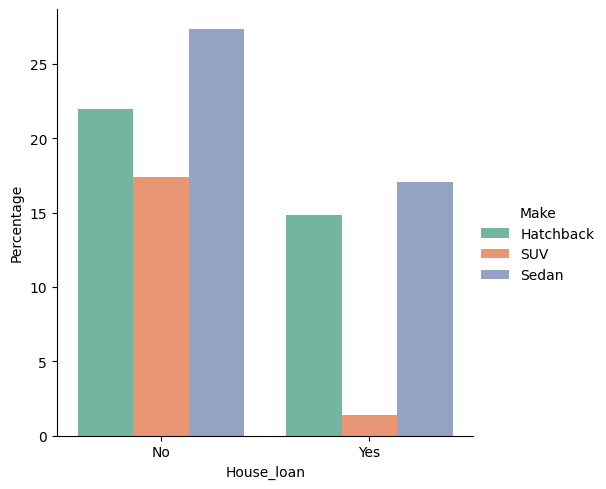

In [47]:
House_loan_customer = df.groupby(['House_loan', 'Make']).size().reset_index(name='Count')
total_counts1 = df['House_loan'].value_counts().sum()
House_loan_customer['Percentage'] = (House_loan_customer['Count'] / total_counts1) * 100
sns.catplot(x='House_loan', y='Percentage', data=House_loan_customer, kind="bar", hue='Make',palette='Set2')
plt.xticks(rotation=0)
plt.show()

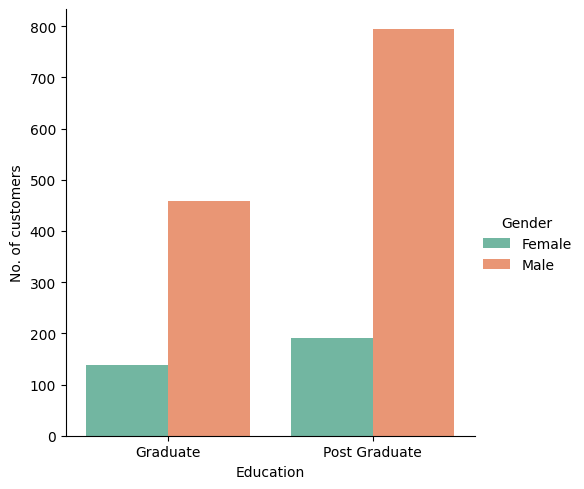

In [48]:
count_data = df.groupby(['Education', 'Gender']).size().reset_index(name='No. of customers')
sns.catplot(x='Education', y='No. of customers', data=count_data, kind="bar", hue='Gender', palette='Set2')
plt.xticks(rotation=0)
plt.show()

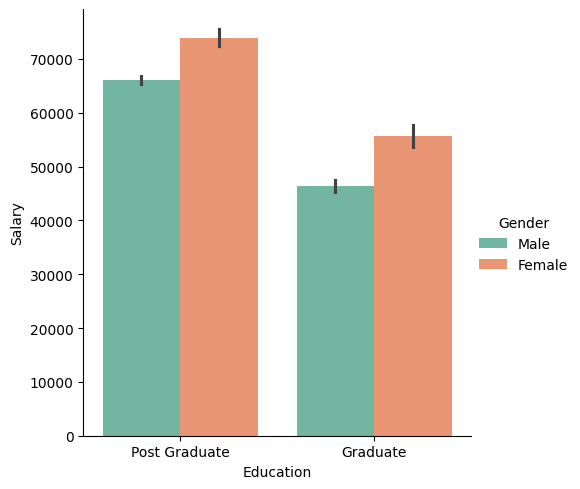

In [49]:
count_data = df.groupby(['Education', 'Gender']).size().reset_index(name='No. of customers')
sns.catplot(x='Education', y='Salary', data=df, kind="bar", hue='Gender',palette='Set2')
plt.xticks(rotation=0)
plt.show()

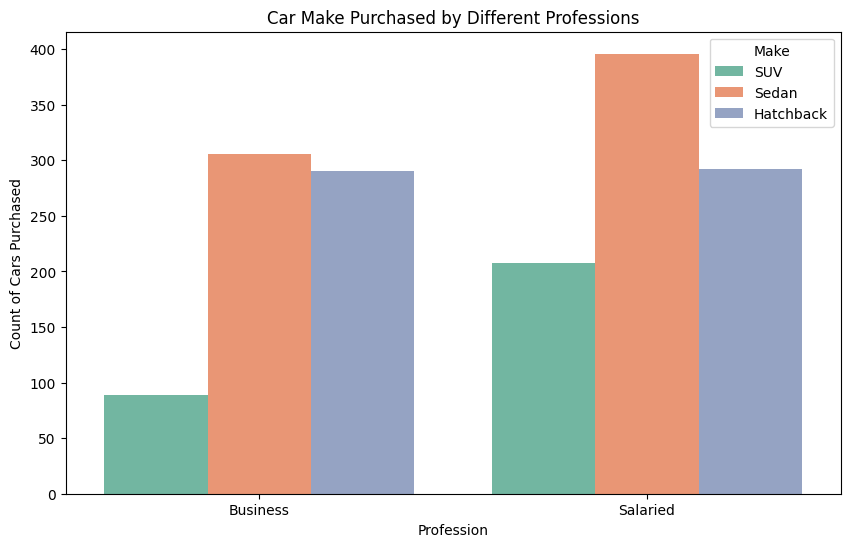

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Profession', hue='Make', data=df, palette='Set2')
plt.title('Car Make Purchased by Different Professions')
plt.xlabel('Profession')
plt.ylabel('Count of Cars Purchased')
plt.xticks(rotation=0)
plt.show()

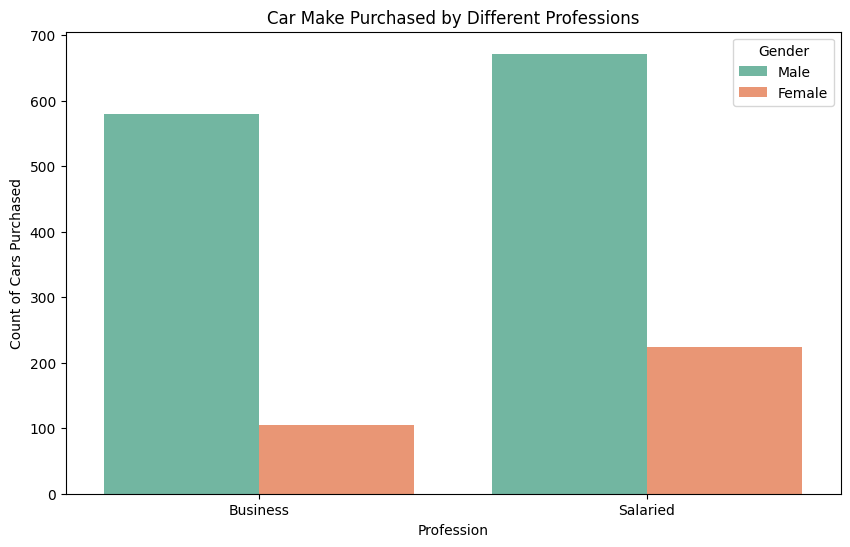

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Profession', hue='Gender', data=df, palette='Set2')
plt.title('Car Make Purchased by Different Professions')
plt.xlabel('Profession')
plt.ylabel('Count of Cars Purchased')
plt.xticks(rotation=0)
plt.show()

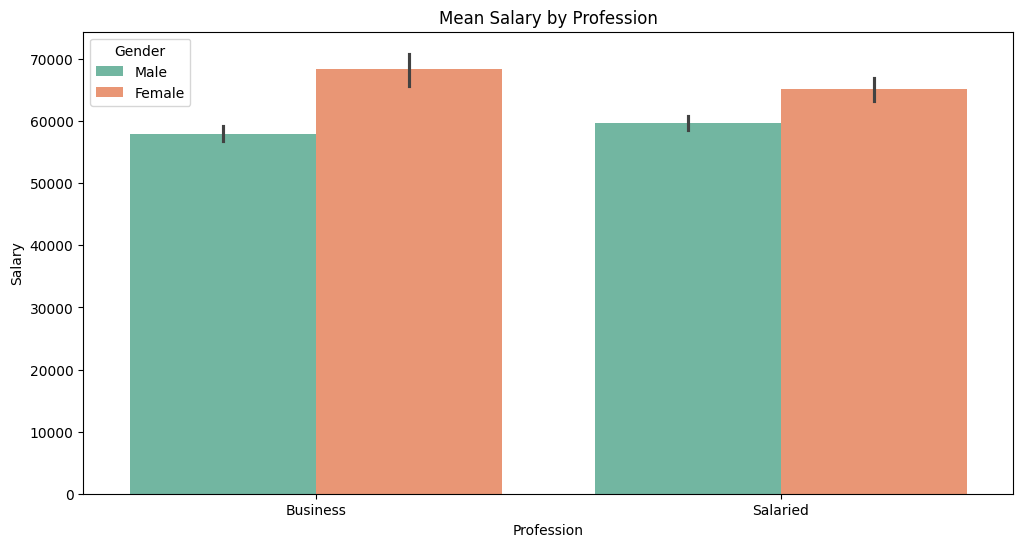

In [52]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Profession', y='Salary', data=df, hue='Gender',estimator=np.mean, palette='Set2')
plt.title('Mean Salary by Profession')
plt.xticks(rotation=0)
plt.show()

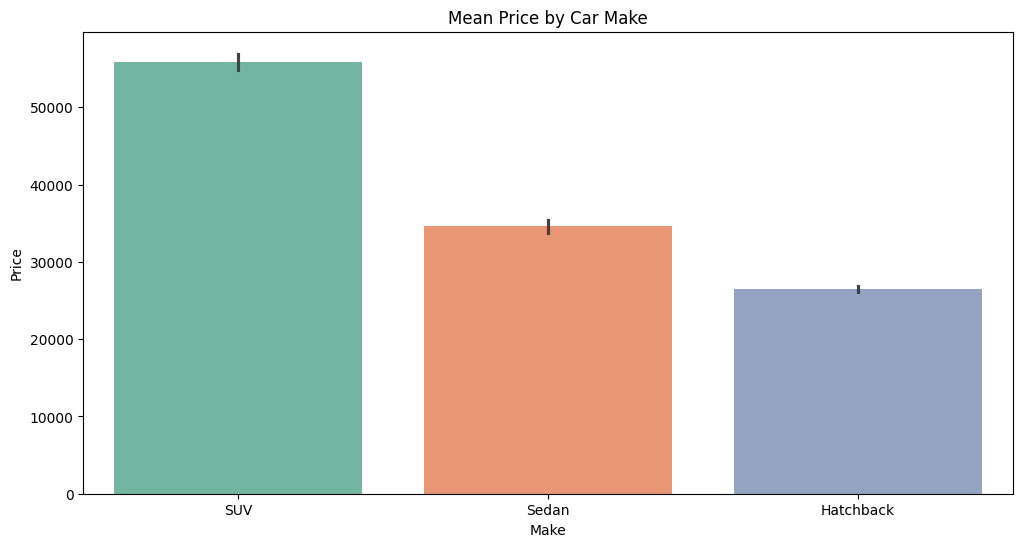

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Price', data=df,hue='Make',palette='Set2', estimator=np.mean)
plt.title('Mean Price by Car Make')
plt.show()

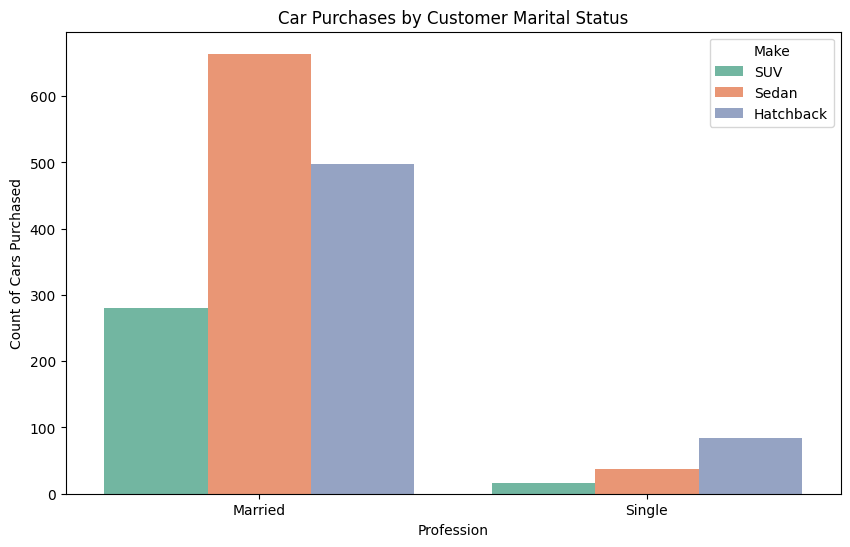

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_status', hue='Make', data=df, palette='Set2')
plt.title('Car Purchases by Customer Marital Status')
plt.xlabel('Profession')
plt.ylabel('Count of Cars Purchased')
plt.xticks(rotation=0)
plt.show()



-----------------------------------------------------------------------------------------------------------------------------------------------------------------



## **KEY QUESTIONS**

**1. Do men tend to prefer SUVs more compared to women?**

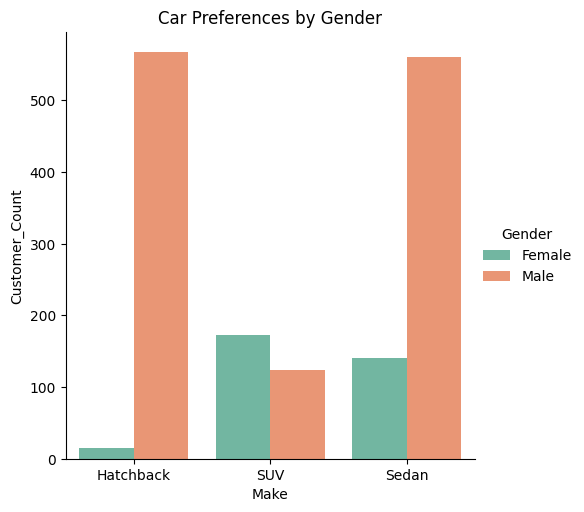

In [55]:
count_data = df.groupby(['Gender', 'Make']).size().reset_index(name='Customer_Count')
sns.catplot(x='Make', y='Customer_Count', data=count_data, kind="bar", hue='Gender', palette='Set2')
plt.title('Car Preferences by Gender')
plt.xticks(rotation=0)
plt.title('Car Preferences by Gender')
plt.show()

In [72]:
gender_make_counts = df.groupby(['Make', 'Gender']).size()

# Display the result
print(gender_make_counts)

Make       Gender
Hatchback  Female     15
           Male      567
SUV        Female    173
           Male      124
Sedan      Female    141
           Male      561
dtype: int64


**2. What is the likelihood of a salaried person buying a Sedan?**

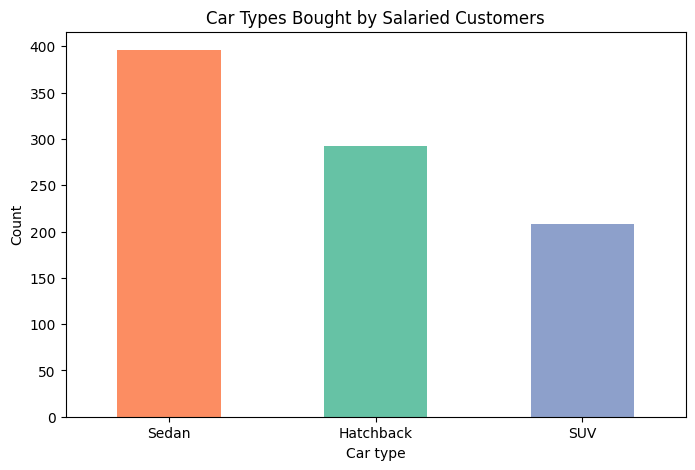

In [56]:
salaried_people = df[df['Profession'] == 'Salaried']
sedan_counts = salaried_people[salaried_people['Make'] == 'Sedan']['Make'].value_counts()
sedan_counts
salaried_make_counts = salaried_people['Make'].value_counts()

# Plotting the counts
plt.figure(figsize=(8, 5))
salaried_make_counts.plot(kind='bar' , color=['#FC8D62', '#66C2A5', '#8DA0CB'])
plt.title('Car Types Bought by Salaried Customers')
plt.xlabel('Car type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [66]:
salaried_customers = df[df['Profession'] == 'Salaried']
salaried_customer_counts = salaried_customers['Make'].value_counts()
salaried_customer_counts

,count
Make,
Sedan,396
Hatchback,292
SUV,208


**3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?**

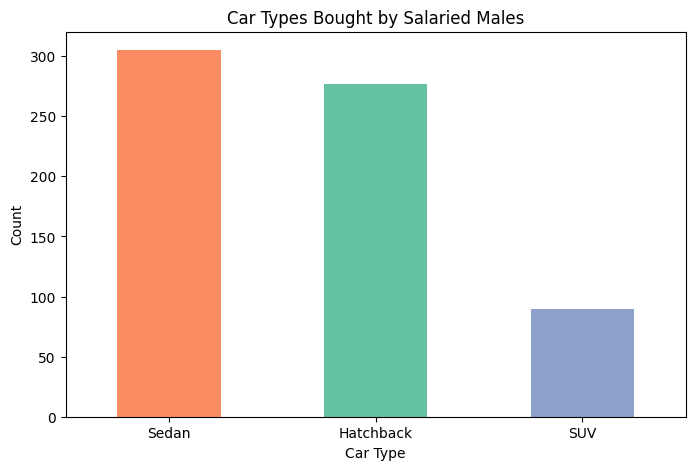

In [57]:
# Filter for salaried males
salaried_males = df[(df['Profession'] == 'Salaried') & (df['Gender'] == 'Male')]

# Count the number of each car type bought by salaried males
make_counts = salaried_males['Make'].value_counts()

plt.figure(figsize=(8, 5))
make_counts.plot(kind='bar', color=['#FC8D62', '#66C2A5', '#8DA0CB'])
plt.title('Car Types Bought by Salaried Males')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [65]:
salaried_male_data = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Salaried')]
salaried_male_counts = salaried_male_data['Make'].value_counts()
salaried_male_counts

,count
Make,
Sedan,305
Hatchback,277
SUV,90


**4. How does the the amount spent on purchasing automobiles vary by gender?**

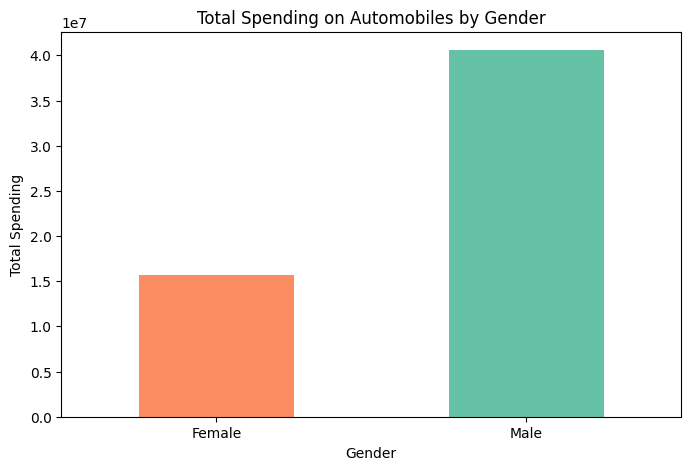

In [58]:
total_spending = df.groupby('Gender')['Price'].sum()

# Plotting the total spending
plt.figure(figsize=(8, 5))
total_spending.plot(kind='bar', color=['#FC8D62', '#66C2A5'])
plt.title('Total Spending on Automobiles by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.show()

In [59]:
total_spent_by_gender = df.groupby('Gender')['Price'].sum()
total_spent_by_gender

,Price
Gender,
Female,15695000
Male,40585000


**5. How much money was spent on purchasing automobiles by individuals who took a personal loan?**

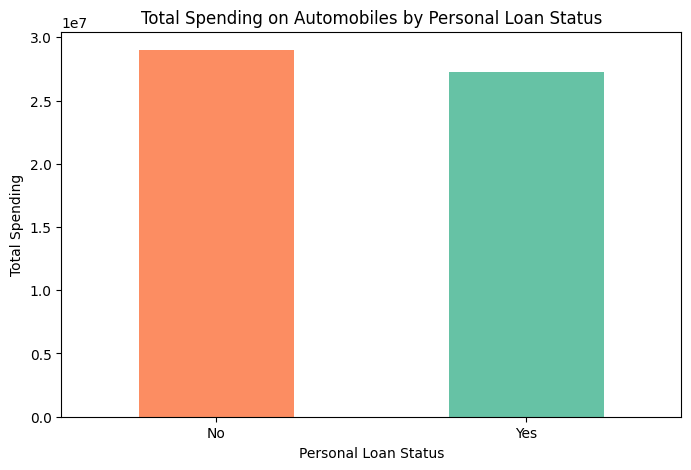

In [60]:
total_spending_by_loan = df.groupby('Personal_loan')['Price'].sum()

# Plotting the total spending
plt.figure(figsize=(8, 5))
total_spending_by_loan.plot(kind='bar', color=['#FC8D62', '#66C2A5'])
plt.title('Total Spending on Automobiles by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.show()

In [75]:
personal_loan_price_totals = df.groupby('Personal_loan')['Price'].sum()

# Display the result
print(personal_loan_price_totals)

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64


In [61]:
total_spending_personal_loan = df[df['Personal_loan'] == 'Yes']['Price'].sum()

print(f"Total amount spent on automobiles by individuals who took a personal loan: {total_spending_personal_loan:,.0f}")

Total amount spent on automobiles by individuals who took a personal loan: 27,290,000


**6. How does having a working partner influence the purchase of higher-priced cars?**

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

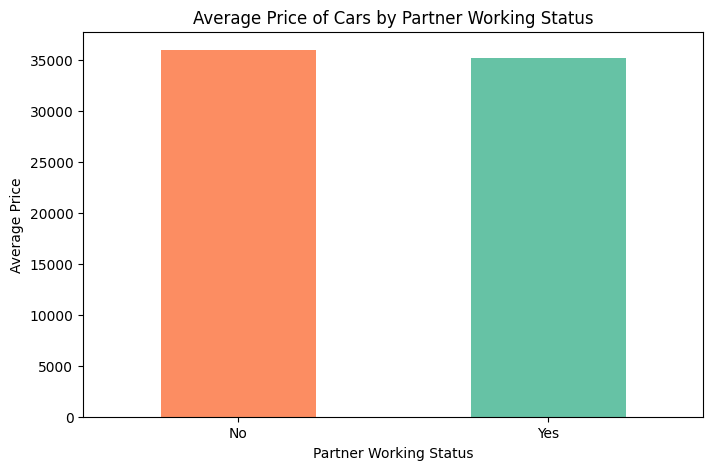

In [62]:
average_price_by_partner = df.groupby('Partner_working')['Price'].mean()

# Plotting the average price
plt.figure(figsize=(8, 5))
ax = average_price_by_partner.plot(kind='bar', color=['#FC8D62', '#66C2A5'])
plt.title('Average Price of Cars by Partner Working Status')
plt.xlabel('Partner Working Status')
plt.ylabel('Average Price')
plt.xticks(rotation=0)

In [74]:
partner_working_salary = df.groupby('Partner_working')['Price'].mean()
partner_working_salary

,Price
Partner_working,
No,36000.000000
Yes,35267.281106


## **Insights:-**

* Target younger customers by focusing marketing efforts on features like
technology, fuel efficiency, and affordability, as the median age of customers is 29.

* Promote vehicles like sedans and hatchbacks that cater to families, as most customers have 2 or 3 dependents.

* Tailor marketing campaigns to female customers by emphasizing the strengths of SUVs, given that 22% of customers are female and they tend to prefer SUVs.

* Offer flexible financing options and tailor vehicle offerings to different income brackets, providing budget-friendly models for lower-income customers and premium models for higher-income customers.

* Continue stocking and promoting sedans, the most popular choice among customers, and consider offering incentives to attract more buyers.

* Ensure the product lineup includes options for price-sensitive customers, such as entry-level models or certified pre-owned vehicles, to address the right-skewed pricing data.

* Highlight premium models and luxury add-ons for higher-income customers, emphasizing advanced features like safety, premium interiors, and technology.

* Offer bundled financing packages that combine car purchases with house loans, appealing to the 67% of customers who have availed house loans.

* Promote alternative financing options, like low-interest car loans or leasing, to customers who may not be influenced by personal loans.

* Emphasize sophistication, reliability, and advanced features in marketing to the significant portion of customers who are postgraduates.

* Develop loyalty programs for salaried professionals, offering incentives like discounts, free servicing, or upgrades to retain this key customer segment.

* Focus on family-oriented features in marketing campaigns to appeal to the 85% of customers who are married.

* Use customer preference data to create detailed profiles for personalized marketing efforts, increasing conversion likelihood.

* Adjust inventory to reflect customer preferences for sedans and hatchbacks while maintaining limited stock of SUVs to optimize turnover.

* Collaborate with financial institutions for joint marketing campaigns targeting customers seeking house loans, enhancing customer acquisition.

* If regional data is available, tailor marketing and inventory strategies to regional trends.

* Regularly analyze competitor pricing to ensure offerings remain competitive and adjust pricing strategies accordingly.






